In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,God Lives in the Himalayas,2009
1,White Gold,1927
2,Stimulus,2004
3,Hypergraphia,2017
4,Wanted,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Othello                 10
She                     10
Anna Karenina           10
Paradise                10
Temptation              10
Name: title, dtype: int64

In [17]:
for col in cast.columns:
    print("Value counts of %s" % col)
    print(cast[col].value_counts().head(5))


Value counts of title
Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   531
The Eschatrilogy: Book of the Dead     517
Name: title, dtype: int64
Value counts of year
2015    147177
2014    145642
2013    136623
2012    130670
2016    129972
Name: year, dtype: int64
Value counts of name
Bess Flowers       811
Herman Hack        678
Sam (II) Harris    643
Lee Phelps         618
Harold Miller      603
Name: name, dtype: int64
Value counts of type
actor      2331950
actress    1113436
Name: type, dtype: int64
Value counts of character
Himself     18925
Dancer      11523
Extra        9805
Reporter     7836
Doctor       7104
Name: character, dtype: int64
Value counts of n
1    141382
2    132416
3    125980
4    119983
5    113798
Name: n, dtype: int64


### Which three years of the 1930s saw the most films released?

In [9]:
titles[
    (titles.year // 10 == 193)
].year.value_counts().head(3)

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

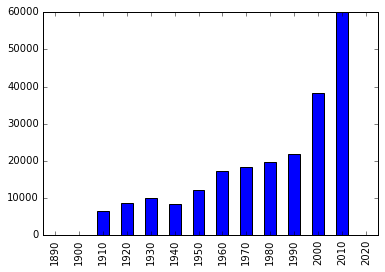

In [15]:
titles['decade'] = titles.year.map(lambda year: year // 10 * 10)
decades_titles = titles.decade.value_counts().sort_index()
decades_titles.plot(kind = "bar")



In [ ]:
titles['decade'] = titles.year.map(lambda year: year // 10 * 10)
decades_titles = titles.decade.value_counts().so

### Plot the number of "Hamlet" films made each decade.

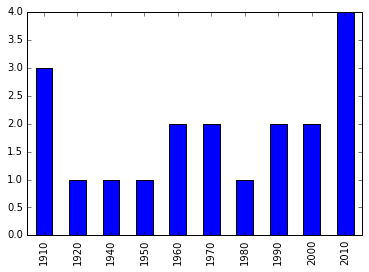

In [19]:
hamlet = titles[titles.title == "Hamlet"].decade.value_counts().sort_index()
hamlet.plot(kind = "bar")

### Plot the number of "Rustler" characters in each decade of the history of film.

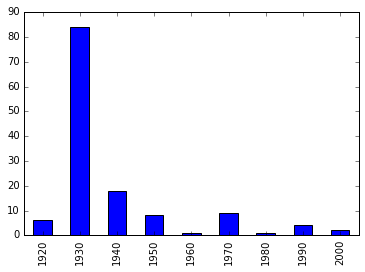

In [22]:
cast[cast.character == "Rustler"].year.map(lambda year: year // 10 * 10).value_counts().sort_index().plot(kind = "bar")

### Plot the number of "Hamlet" characters each decade.

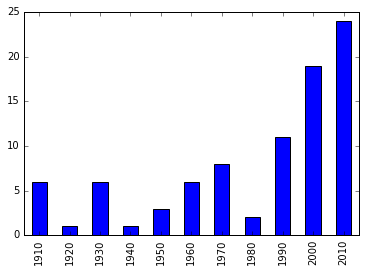

In [8]:
cast[cast.character == "Hamlet"].year.map(lambda year: year // 10 *10).value_counts().sort_index().plot(kind = "bar")

### What are the 11 most common character names in movie history?

In [26]:
cast.character.value_counts().head(11)


Himself        18925
Dancer         11523
Extra           9805
Reporter        7836
Doctor          7104
Student         6660
Policeman       6658
Party Guest     6399
Nurse           6346
Bartender       6320
Minor Role      6094
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [30]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      7
Lili?n Garc?a          7
Mary Jo Pehl           7
Joan Rivers            6
Marilyn Monroe         5
Bunny Yeager           5
Caroline Rhea          5
Hillary Clinton        5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [9]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Benito Mussolini         20
Bill Clinton             20
Franklin D. Roosevelt    20
Winston Churchill        20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [11]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Larry Steers        25
Franklyn Farnum     25
Tom London          24
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [12]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           21
Shakti Kapoor       19
Sukumari            19
Lou Scheimer        15
Mohanlal            15
Raj Babbar          14
Aruna Irani         14
Rajesh Khanna       13
Deven Verma         13
Satyendra Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

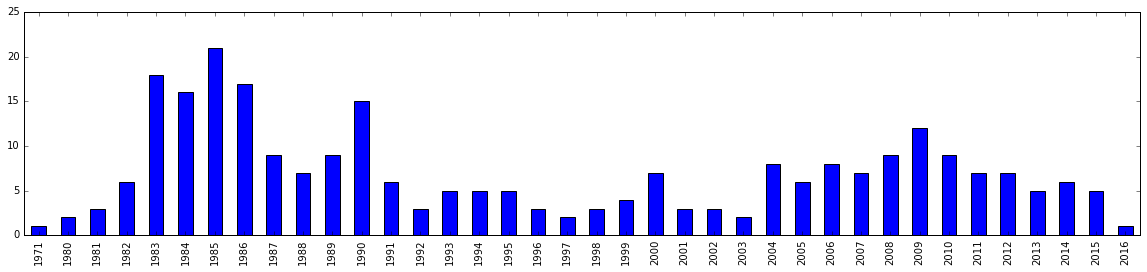

In [15]:
cast[cast.name == "Mammootty"].year.value_counts().sort_index().plot(kind = "bar", figsize=(20,4))

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [23]:
cast[cast.character.str.contains('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [24]:
cast[cast.character.str.startswith('Science ')].character.value_counts().head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Reporter         5
Science Club Member      5
Science Kid              4
Science Promo Cadet      4
Science teacher          3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

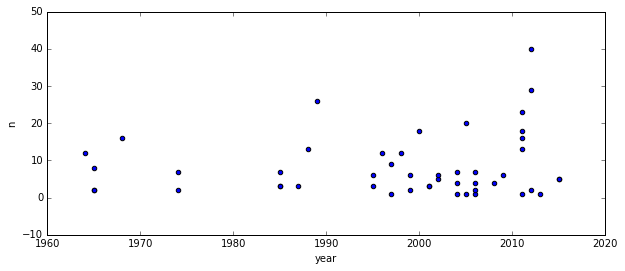

In [63]:
cast[(cast.name == 'Judi Dench') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind = 'scatter', figsize=(10,4))

### Plot the n-values of Cary Grant's roles through his career.

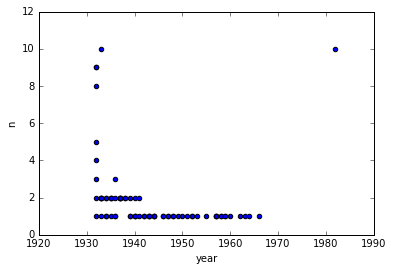

In [68]:
cast[(cast.name == 'Cary Grant') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

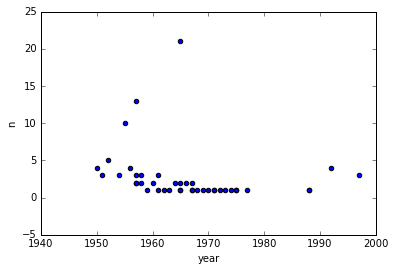

In [69]:
cast[(cast.name == 'Sidney Poitier') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [70]:
cast[(cast.n == 1) & (cast.year == 1950 // 10 * 10)].type.value_counts()

actor      604
actress    278
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [71]:
cast[(cast.n == 2) & (cast.year == 1950 // 10 * 10)].type.value_counts()

actor      426
actress    402
Name: type, dtype: int64